In [1]:
import sys       ###navigationprepare（下の図も）
sys.path.append('../scripts/')
from robot import *
from kf import *

In [2]:
class Goal: 
    def __init__(self, x, y, radius=0.3):
        self.pos = np.array([x, y]).T
        self.radius = radius
        
    def draw(self, ax, elems):
        x, y = self.pos
        c = ax.scatter(x + 0.16, y + 0.5, s=50, marker=">", label="landmarks", color="red") #旗
        elems.append(c)
        elems += ax.plot([x, x], [y, y + 0.6], color="black") #旗竿

<IPython.core.display.Javascript object>


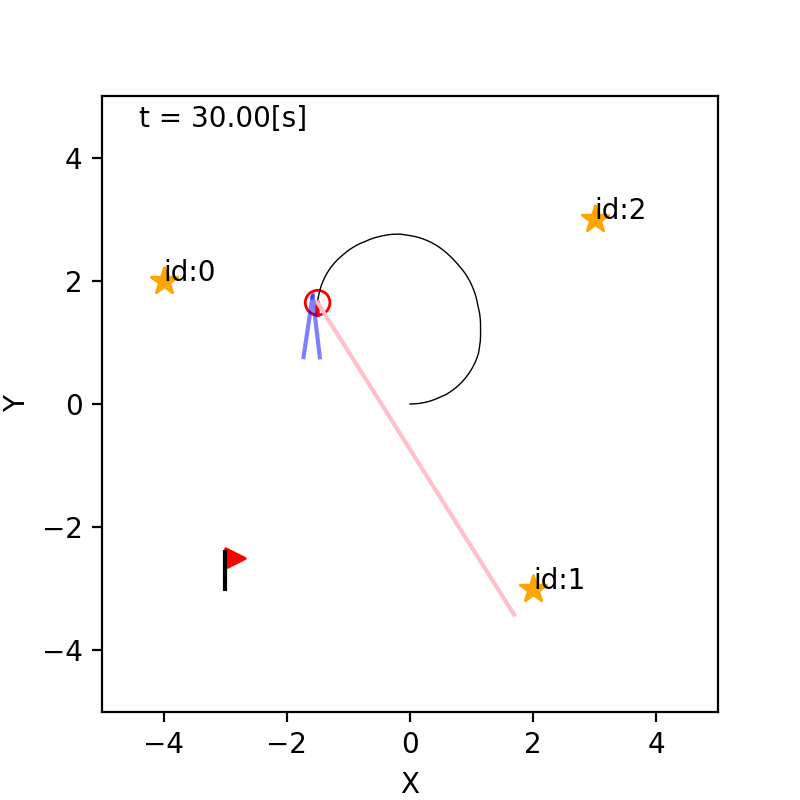

In [3]:
if __name__ == '__main__': 
    time_interval = 0.1
    world = World(30, time_interval) 

    m = Map()                                  
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)
    
    ###ゴールの追加###
    world.append(Goal(-3,-3))

    ### ロボットを作る ###
    kfa = KfAgent(time_interval, 0.2, 10.0/180*math.pi, np.array([0, 0, 0]).T, m) #地図を引数で渡す
    r = Robot(np.array([0,0,0]).T, sensor=Camera(m, distance_bias_rate_stddev=0, direction_bias_stddev=0), 
              agent=kfa, color="red", bias_rate_stds=(0,0))

    world.append(r)
    
    world.draw()